Todo:
- Get the video workings
- Implenting the new library
- Saving/ Loading Models
- Dataloader for levels

## Install Dependencies

In [ ]:
!rm -r interaction_icaros
!git clone --recursive https://github.com/jignesh284/interaction_icaros.git
!pip install ./interaction_icaros/gym

Cloning into 'interaction_icaros'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 7614 (delta 2), reused 12 (delta 1), pack-reused 7601
Receiving objects: 100% (7614/7614), 109.38 MiB | 21.06 MiB/s, done.
Resolving deltas: 100% (946/946), done.
Submodule 'gym' (https://github.com/ndennler/gym.git) registered for path 'gym'
Cloning into '/content/interaction_icaros/gym'...
remote: Enumerating objects: 22, done.        
remote: Counting objects: 100% (22/22), done.        
remote: Compressing objects: 100% (17/17), done.        
remote: Total 10834 (delta 9), reused 10 (delta 5), pack-reused 10812        
Receiving objects: 100% (10834/10834), 4.14 MiB | 15.43 MiB/s, done.
Resolving deltas: 100% (7333/7333), done.
Submodule path 'gym': checked out 'ebf869343da3ec8207e2398f4c56284cddc6f9fa'
Processing ./interaction_icaros/gym
  Created wheel for gym: filename=gym-0.17.3-cp36-none-any.whl

In [ ]:
# ! git clone https://github.com/openai/baselines.git
# ! pip install ./baselines

In [ ]:
#remove " > /dev/null 2>&1" to see what is going on under the hood

# !pip install gym
!pip install pyvirtualdisplay > /dev/null 2>&1
!pip install pybullet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg swig> /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup> /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!pip install box2d 2>&1

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (50.3.2)


In [ ]:
#environment imports
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
from gym import wrappers
# gymlogger.set_level(40) #error only

from torch.utils.data.sampler import BatchSampler, SubsetRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions.categorical import Categorical

#math imports
import numpy as np
import random
import base64
import math
import time

#plotting imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#I/O imports
import glob
import io

#IPython Display schtuff
from IPython.display import clear_output
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env, log_dir):
  env = Monitor(env, log_dir, force=True)
  return env


## Test Loading the Environment

In [ ]:
env = wrap_env(gym.make("LunarLander-v2"), './video')

In [ ]:
#check out the Lunar Lander action space!
print(env.action_space)

Discrete(4)


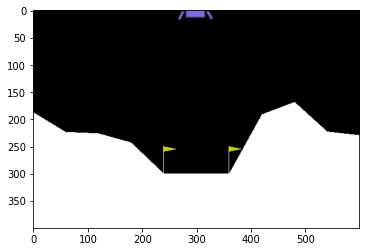

In [ ]:
from IPython.display import HTML
import base64
import io

env.load_terrain([7.0925,  5.8748,  5.7912,  5.2321,  3.1553,  3.1261,  3.1880,  6.9503,
          7.7113,  5.8987,  5.6749])
observation = env.reset()
plt.imshow(env.render(mode='rgb_array'))
plt.show()
# print(env.terrain_y_values)
while True:
  
    env.render()
    
    #your agent goes here
    action = 2 
    observation, reward, done, info = env.step(action) 
    
        
    if done: 
      break;
            
env.close()
show_video()

Observation: [ 0.01607866  1.4151044   0.80634195  0.08007368 -0.01623451 -0.13747424
  0.          0.        ]
Reward: 0.6335450439868862
Done: False
Info: {}
Image shape: (400, 600, 3)


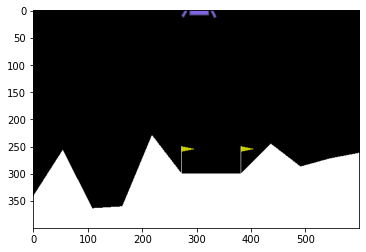

In [ ]:
################# TODO: YOUR CODE BELOW #############################
#################  Each todo here is 1 line of code  ################

# 1. Make a new environment MiniGrid-Empty-8x8-v0
env = gym.make('LunarLander-v2')

# 2. Reset the environment
env.reset()

# 3. Select the action right
action = env.action_space.sample()

# 4. Take a step in the environment and store it in appropriate variables
obs, reward, done, info = env.step(action)

# 5. Render the current state of the environment
img = env.render('rgb_array')
################# YOUR CODE ENDS HERE ###############################

print('Observation:', obs)
print('Reward:', reward)
print('Done:', done)
print('Info:', info)
print('Image shape:', img.shape)
plt.imshow(img)
plt.show()

## Defining RL Agent Things



### Defining the Rollout Storage

In [ ]:


# class RolloutStorage():
#     def __init__(self, rollout_size, obs_size):
#         '''
#         rollout_size: The size of the rollout buffer
#         obs_size: The dimension of the observation vector
#         '''
#         self.rollout_size = rollout_size
#         self.obs_size = obs_size
#         self.reset()
        
#     def insert(self, step, done, action, log_prob, reward, obs):
#         '''
#         Inserting the transition at the current step number in the environment.
#         '''
#         self.done[step].copy_(done)
#         self.actions[step].copy_(action)
#         self.log_probs[step].copy_(log_prob)
#         self.rewards[step].copy_(reward)
#         self.obs[step].copy_(obs)
        
#     def reset(self):
#         '''
#         Initialize all storage buffers with zeros.
#         '''
#         self.done = torch.zeros(self.rollout_size, 1)
#         self.returns = torch.zeros(self.rollout_size+1, 1, requires_grad=False)
#         self.actions = torch.zeros(self.rollout_size, 1, dtype=torch.int64)  # Assuming Discrete Action Space
#         self.log_probs = torch.zeros(self.rollout_size, 1)
#         self.rewards = torch.zeros(self.rollout_size, 1)
#         self.obs = torch.zeros(self.rollout_size, self.obs_size)
        
#     def compute_returns(self, gamma):
#         '''
#         Compute cumulative discounted returns from the current state to the end of the episode.
#         '''
#         self.last_done = (self.done == 1).nonzero().max()  # Find point of last episode's end in buffer.
#         self.returns[self.last_done+1] = 0.  # Initialize the return at the end of last episode to be 0.

#         # Accumulate discounted returns using dynamic programming.
#         # Cumulative return = reward from current step + discounted future reward until end of episode.
#         for step in reversed(range(self.last_done+1)):
#             self.returns[step] = self.rewards[step] + \
#                                 self.returns[step + 1] * gamma * (1 - self.done[step])
        
#     def batch_sampler(self, batch_size, get_old_log_probs=False):
#         '''
#         Create a batch sampler of indices. Return actions, returns, observation for training.
#         get_old_log_probs: This is required for PPO to recall the log_prob of the action w.r.t.
#                            the policy that generated this transition.
#         '''
#         sampler = BatchSampler(
#             SubsetRandomSampler(range(self.last_done)),
#             batch_size,
#             drop_last=True)
#         for indices in sampler:
#             if get_old_log_probs:
#                 yield self.actions[indices], self.returns[indices], self.obs[indices], self.log_probs[indices]
#             else:
#                 yield self.actions[indices], self.returns[indices], self.obs[indices]

### Policy Network

In [ ]:

# # from utils import count_model_params

# class ActorNetwork(nn.Module):
#     def __init__(self, num_inputs, num_actions, hidden_dim):
#         super().__init__()
#         self.num_actions = num_actions
        
#         ############################## TODO: YOUR CODE BELOW ###############################
#         ### 1. Build the Actor network as a torch.nn.Sequential module                   ###
#         ###    with the following layers:                                                ###
#         ###        (1) a Linear layer mapping from input dimension to hidden dimension   ###
#         ###        (2) a Tanh non-linearity                                              ###
#         ###        (3) a Linear layer mapping from hidden dimension to hidden dimension  ###
#         ###        (4) a Tanh non-linearity                                              ###
#         ###        (5) a Linear layer mapping from hidden dimension to number of actions ###
#         ### HINT: We do not need an activation on the output, because the actor is       ###
#         ###       predicting logits for categorical distribution.                        ###
#         ####################################################################################
#         self.fc = nn.Sequential(
#             nn.Linear(num_inputs, hidden_dim),
#             nn.Tanh(),
#             nn.Linear(hidden_dim, hidden_dim),
#             nn.Tanh(),
#             nn.Linear(hidden_dim, num_actions)
#         )
#         ################################# END OF YOUR CODE #################################
        
#     def forward(self, state):
#         x = self.fc(state)
#         return x

# class Policy():
#     '''
#     Policy Class used for acting in the environment and updating the policy network.
#     '''
#     def __init__(self, num_inputs, num_actions, hidden_dim, learning_rate,
#                  batch_size, policy_epochs, entropy_coef=0.001):
#         self.actor = ActorNetwork(num_inputs, num_actions, hidden_dim)
#         self.optimizer = optim.Adam(self.actor.parameters(), lr=learning_rate)
#         self.batch_size = batch_size
#         self.policy_epochs = policy_epochs
#         self.entropy_coef = entropy_coef

#     def act(self, state):
#         ############################## TODO: YOUR CODE BELOW ###############################
#         ### 1. Run the actor network on the current state to get the action logits       ###
#         ### 2. Build a Categorical(...) instance from the logits                         ###
#         ### 3. Sample an action using the built-in sample() function of distribution.    ###
#         ### Documentation of Categorical:                                                ###
#         ### https://pytorch.org/docs/stable/distributions.html#torch.distributions.categorical.Categorical
#         ####################################################################################
#         logits = self.actor(state)
#         dist =  Categorical(logits=logits)
#         action = dist.sample()
#         ################################# END OF YOUR CODE #################################
#         log_prob = dist.log_prob(action)
#         return action, log_prob
    
#     def evaluate_actions(self, state, action):
#         '''
#         Evaluate the log probability of an action under the policy's output
#         distribution for a given state.
        
#         state -> tensor: [batch_size, obs_size]
#         action -> tensor: [batch_size, 1]
#         '''
#         ############################## TODO: YOUR CODE BELOW ###############################
#         ### This function is used for policy update to evaluate log_prob and entropy of  ###
#         ### actor network.                                                               ###
#         ### TODO: 
#         ### 1. Compute logits and distribution for the given state (just like above).
#         ### 2. Compute log probability of the given action under this distribution.
#         ###    Hint: Input to the distribution should be in the shape [batch_size].
#         ###          You may find `action.squeeze(...)` helpful.
#         ### 3. Compute the entropy of the distribution.
#         ####################################################################################
#         logits = self.actor(state)
#         dist =  Categorical(logits=logits)
#         log_prob = dist.log_prob(action.squeeze())
#         entropy = dist.entropy()
#         ################################# END OF YOUR CODE #################################
#         return log_prob.view(-1, 1), entropy.view(-1, 1)
    
#     def update(self, rollouts):
#         '''
#         Performing policy gradient update with maximum entropy regularization
        
#         rollouts -> The storage buffer
#         self.policy_epochs -> Number of times we train over the storage buffer
#         '''
#         for epoch in range(self.policy_epochs):
#             data = rollouts.batch_sampler(self.batch_size)
            
#             for sample in data:
#                 actions_batch, returns_batch, obs_batch = sample
                
#                 # Compute Log probabilities and entropy for each sampled (state, action)
#                 log_probs_batch, entropy_batch = self.evaluate_actions(obs_batch, actions_batch)
    
#                 ############################## TODO: YOUR CODE BELOW ###############################
#                 ### 4. Compute the mean loss for the policy update using action log-             ###
#                 ###     probabilities and policy returns                                         ###
#                 ### 5. Compute the mean entropy for the policy update                            ###
#                 ###    *HINT*: PyTorch optimizer is used to minimize by default.                 ###
#                 ###     The trick to maximize a quantity is to negate its corresponding loss.    ###
#                 ####################################################################################
#                 policy_loss = -torch.mean(log_probs_batch * returns_batch)
#                 entropy_loss = -torch.mean(entropy_batch)
#                 ################################# END OF YOUR CODE #################################
                
#                 loss = policy_loss + self.entropy_coef * entropy_loss
                
#                 self.optimizer.zero_grad()
#                 loss.backward(retain_graph=False)
#                 self.optimizer.step()
                
#     @property
#     def num_params(self):
#       return sum(p.numel() for p in self.actor.parameters())

### Utils

In [ ]:
# def instantiate(params_in, nonwrapped_env=None, seed=123):
#     '''
#     SETTING SEED: it is good practice to set seeds when running experiments to keep results comparable
#     '''
#     np.random.seed(seed)
#     torch.manual_seed(seed)
    
#     params = copy.deepcopy(params_in)

#     '''
#     1. Instantiate the environment
#     # If an environment is given as input to this function, we directly use that.
#     # Else, we use the environment specified in `params`.
#     '''
#     if nonwrapped_env is None:
#         nonwrapped_env = gym.make(params.env_name)
#     env = nonwrapped_env
    
#     obs_size = env.observation_space.shape[0]
#     num_actions = env.action_space.n
#     env.seed(seed)   # Required for reproducibility in stochastic environments.

#     '''
#     2. Instantiate Rollout Buffer and Policy
#     '''
#     rollouts = RolloutStorage(params.rollout_size, obs_size)
#     policy_class = params.policy_params.pop('policy_class')    
#     policy = policy_class(obs_size, num_actions, **params.policy_params)
    
#     return env, rollouts, policy

In [ ]:
# def train(env, rollouts, policy, params):
#     rollout_time, update_time = AverageMeter(), AverageMeter()  # Loggers
#     rewards, success_rate = [], []

#     print("Training model with {} parameters...".format(policy.num_params))

#     '''
#     Training Loop
#     '''
#     for j in range(params.num_updates):
#         ## Initialization
#         avg_eps_reward, avg_success_rate = AverageMeter(), AverageMeter()
#         done = False
#         prev_obs = env.reset()
#         prev_obs = torch.tensor(prev_obs, dtype=torch.float32)
#         eps_reward = 0.
#         start_time = time.time()
        
#         ## Collect rollouts
#         for step in range(rollouts.rollout_size):
#             if done:
#                 # Store episode statistics
#                 avg_eps_reward.update(eps_reward)
#                 if 'success' in info: 
#                     avg_success_rate.update(int(info['success']))

#                 # Reset Environment
#                 obs = env.reset()
#                 obs = torch.tensor(obs, dtype=torch.float32)
#                 eps_reward = 0.
#             else:
#                 obs = prev_obs

#             ############################## TODO: YOUR CODE BELOW ###############################
#             ### 1. Call the policy to get the action for the current observation,            ###
#             ### 2. Take one step in the environment (using the policy's action)              ###
#             ####################################################################################
#             action, log_prob = policy.act(obs)
#             # action = 
#             obs, reward, done, info = env.step(action.item())
#             ################################# END OF YOUR CODE #################################

            
#             ############################## TODO: YOUR CODE BELOW ###############################
#             ### 3. Insert the sample <done, action, log_prob, reward, prev_obs> in the       ###
#             ###    rollout storage. (requires just 1 line)                                   ###
#             ### HINT:                                                                        ###
#             ### - 'done' and 'reward' need to be converted to float32 tensors first          ###
#             ### - Remember we are storing the previous observation because                   ###
#             ###   that's what decided the policy's action                                    ###
#             ####################################################################################
#             rollouts.insert(step, torch.tensor(done, dtype=torch.float32), action, log_prob, 
#                             torch.tensor(reward, dtype=torch.float32), prev_obs)
#             ################################# END OF YOUR CODE #################################
            
#             prev_obs = torch.tensor(obs, dtype=torch.float32)
#             eps_reward += reward
        
#         ############################## TODO: YOUR CODE BELOW ###############################
#         ### 4. Use the rollout buffer's function to compute the returns for all          ###
#         ###    stored rollout steps. Discount factor is given in 'params'                ###
#         ### HINT: This requires just 1 line of code.                                     ###
#         ####################################################################################
#         rollouts.compute_returns(params.discount)
#         ################################# END OF YOUR CODE #################################
        
#         rollout_done_time = time.time()

#         ############################## TODO: YOUR CODE BELOW ###############################
#         ### 5. Call the policy's update function using the collected rollouts            ###
#         ####################################################################################
#         policy.update(rollouts)
#         ################################# END OF YOUR CODE #################################

#         update_done_time = time.time()
#         rollouts.reset()

#         ## log metrics
#         rewards.append(avg_eps_reward.avg)
#         if avg_success_rate.count > 0:
#             success_rate.append(avg_success_rate.avg)
#         rollout_time.update(rollout_done_time - start_time)
#         update_time.update(update_done_time - rollout_done_time)
#         print('it {}: avgR: {:.3f} -- rollout_time: {:.3f}sec -- update_time: {:.3f}sec'.format(j, avg_eps_reward.avg, 
#                                                                                                 rollout_time.avg, 
#                                                                                                 update_time.avg))
#         if j % params.plotting_iters == 0 and j != 0:
#             plot_learning_curve(rewards, success_rate, params.num_updates)
#             # log_policy_rollout(policy, params.env_name, pytorch_policy=True)
#     clear_output()   # this removes all training outputs to keep the notebook clean, DON'T REMOVE THIS LINE!
#     return rewards, success_rate

In [ ]:
# class ParamDict(dict):
#     __setattr__ = dict.__setitem__
#     def __getattr__(self, attr):
#         # Take care that getattr() raises AttributeError, not KeyError.
#         # Required e.g. for hasattr(), deepcopy and OrderedDict.
#         try:
#             return self.__getitem__(attr)
#         except KeyError:
#             raise AttributeError("Attribute %r not found" % attr)
#     def __getstate__(self): return self
#     def __setstate__(self, d): self = d

# def plot_grid_std_learning_curves(d, num_it):
#     for i, key in enumerate(d):
#         ax = plt.subplot(2, 2, i+1)
#         rewards, success_rates = d[key]
#         plot_std_learning_curves(rewards, success_rates, num_it, no_show=True)
#         ax.set_title(key)
#     plt.show()


# def plot_std_learning_curves(rewards, success_rates, num_it, no_show=False):
#     r, sr = np.asarray(rewards), np.asarray(success_rates)
#     df = pd.DataFrame(r).melt()
#     sns.lineplot(x="variable", y="value", data=df, label='reward/eps')
#     df = pd.DataFrame(sr).melt()
#     sns.lineplot(x="variable", y="value", data=df, label='success rate')
#     plt.xlabel("Training iterations")
#     plt.ylabel("")
#     plt.xlim([0, num_it])
#     plt.ylim([-200, 100])
#     plt.legend()
#     plt.grid('on')
#     if not no_show:
#         plt.show()


# def plot_learning_curve(rewards, success_rate, num_it, plot_std=False):
#     if plot_std:
#         # plots shaded regions if list of reward timeseries is given
#         plot_std_learning_curves(rewards, success_rate, num_it)
#     else:
#         plt.plot(rewards, label='reward/eps')
#         if success_rate:
#             plt.plot(success_rate, label='success rate')
#             plt.legend()
#         else:
#             plt.ylabel('return / eps')
#         plt.ylim([-200, 100])
#         plt.xlim([0, num_it - 1])
#         plt.xlabel('train iter')
#         plt.grid('on')
#         plt.show()

# class AverageMeter(object):
#     """Computes and stores the average and current value"""

#     def __init__(self):
#         self.reset()

#     def reset(self):
#         self.val = 0
#         self.avg = 0
#         self.sum = 0
#         self.count = 0

#     def update(self, val, n=1):
#         self.val = val
#         self.sum += val * n
#         self.count += n
#         self.avg = self.sum / self.count

# def gen_wrapped_env(env_name):
#     return wrap_env(gym.make(env_name))


# # This function plots videos of rollouts (episodes) of a given policy and environment
# def log_policy_rollout(policy, env_name, pytorch_policy=False, level=None):
#     # Create environment with flat observation
#     env = gen_wrapped_env(env_name)

#     if level != None:
#       env.load_terrain(level)
#     # Initialize environment
#     observation = env.reset()

#     done = False
#     episode_reward = 0
#     episode_length = 0

#     # Run until done == True
#     while not done:
#       # Take a step
#         if pytorch_policy: 
#             observation = torch.tensor(observation, dtype=torch.float32)
#             action = policy.act(observation)[0].data.cpu().numpy()
#         else:
#             action = policy.act(observation)[0]
#         observation, reward, done, info = env.step(action)

#         episode_reward += reward
#         episode_length += 1

#     img = env.render('rgb_array')
#     plt.figure()
#     plt.imshow(img)
#     plt.title('REWARD {}, LENGTH {}'.format(episode_reward, episode_length))
#     # print('Total reward:', episode_reward)
#     # print('Total length:', episode_length)

#     # env.close()
    
#     # show_video()

### Vanilla Policy Gradients 
(Just Actor Network)

In [ ]:
# # hyperparameters
# policy_params = ParamDict(
#     policy_class = Policy,    # Policy class to use (replaced later)     
#     hidden_dim = 32,          # dimension of the hidden state in actor network
#     learning_rate = 1e-3,     # learning rate of policy update
#     batch_size = 1024,        # batch size for policy update
#     policy_epochs = 4,        # number of epochs per policy update
#     entropy_coef = 0.001,     # hyperparameter to vary the contribution of entropy loss
# )
# params = ParamDict(
#     policy_params = policy_params,
#     rollout_size = 2050,      # number of collected rollout steps per policy update
#     num_updates = 200,         # number of training policy iterations
#     discount = 0.99,          # discount factor
#     plotting_iters = 10,      # interval for logging graphs and policy rollouts
#     env_name = 'LunarLander-v2',  # we are using a tiny environment here for testing
# )

In [ ]:
# import copy
# env, rollouts, policy = instantiate(params)
# env.load_terrain([2.5668, 0.8473, 3.2891, 1.4700, 2.5869, 2.4287, 2.6033, 2.1752, 4.6830, 0.3597, 3.1192])
# rewards, success_rate = train(env, rollouts, policy, params)
# print("Training completed!")

In [ ]:
# # final reward + policy plotting for easier evaluation
# plot_learning_curve(rewards, success_rate, params.num_updates)
# for _ in range(3):
#     log_policy_rollout(policy, params.env_name, pytorch_policy=True, level=[2.5668, 0.8473, 3.2891, 1.4700, 2.5869, 2.4287, 2.6033, 2.1752, 4.6830, 0.3597, 3.1192])

### Actor-Critic

In [ ]:
# class CriticNetwork(nn.Module):
#     def __init__(self, num_inputs, hidden_dim):
#         super().__init__()

#         ############################## TODO: YOUR CODE BELOW ###############################
#         ### 1. Build the Actor network as a torch.nn.Sequential module                   ###
#         ###    with the following layers:                                                ###
#         ###        (1) a Linear layer mapping from input dimension to hidden dimension   ###
#         ###        (2) a Tanh non-linearity                                              ###
#         ###        (3) a Linear layer mapping from hidden dimension to hidden dimension  ###
#         ###        (4) a Tanh non-linearity                                              ###
#         ###        (5) a Linear layer mapping from hidden dimension to 1                 ###
#         ### HINT: We do not need an activation on the output, because the actor is       ###
#         ###       predicting a value, which can be any real number                       ###
#         ####################################################################################
#         self.fc = nn.Sequential(
#             nn.Linear(num_inputs,hidden_dim),
#             nn.Tanh(),
#             nn.Linear(hidden_dim, hidden_dim),
#             nn.Tanh(),
#             nn.Linear(hidden_dim,1)
#         )
#         ################################# END OF YOUR CODE #################################

#     def forward(self, state):
#         x = self.fc(state)
#         return x


# class ACPolicy(Policy):
#     def __init__(self, num_inputs, num_actions, hidden_dim, learning_rate, batch_size, policy_epochs,
#                  entropy_coef=0.001, critic_coef=0.5):
#         super().__init__(num_inputs, num_actions, hidden_dim, learning_rate, batch_size, policy_epochs, entropy_coef)

#         self.critic = CriticNetwork(num_inputs, hidden_dim)
        
#         ############################## TODO: YOUR CODE BELOW ###############################
#         ### Create a common optimizer for actor and critic with the given learning rate  ###
#         ### (requires 1-line of code)                                                    ###
#         ####################################################################################
#         self.optimizer = optim.Adam(list(self.critic.parameters()) + list(self.actor.parameters()), lr=learning_rate)
#         ################################# END OF YOUR CODE #################################

#         self.critic_coef = critic_coef
        
#     def update(self, rollouts): 
#         for epoch in range(self.policy_epochs):
#             data = rollouts.batch_sampler(self.batch_size)
            
#             for sample in data:
#                 actions_batch, returns_batch, obs_batch = sample
#                 log_probs_batch, entropy_batch = self.evaluate_actions(obs_batch, actions_batch)

#                 value_batch = self.critic(obs_batch)
#                 advantage = returns_batch - value_batch.detach()

                
#                 ############################## TODO: YOUR CODE BELOW ###############################
#                 ### 1. Compute the mean loss for the policy update using action log-             ###
#                 ###     probabilities and advantages.                                            ###
#                 ### 2. Compute the mean entropy for the policy update                            ###
#                 ### 3. Compute the critic loss as MSE loss between estimated value and expected  ###
#                 ###     returns.                                                                 ###
#                 ###    *HINT*: Carefully select the signs of each of the losses .                ###
#                 ####################################################################################
#                 policy_loss = -torch.mean(log_probs_batch*advantage)
#                 entropy_loss = -torch.mean(entropy_batch)
#                 critic_loss = nn.MSELoss()(value_batch, returns_batch)
#                 ################################# END OF YOUR CODE #################################
                
#                 loss = policy_loss + \
#                         self.critic_coef * critic_loss + \
#                         self.entropy_coef * entropy_loss

#                 self.optimizer.zero_grad()
#                 loss.backward()
#                 self.optimizer.step()
                
#     @property
#     def num_params(self):
#         return super().num_params + sum(p.numel() for p in self.critic.parameters())

In [ ]:
# n_seeds=1

In [ ]:
# # hyperparameters
# policy_params = ParamDict(
#     policy_class = ACPolicy,  # Policy class to use (replaced later)
#     hidden_dim = 32,          # dimension of the hidden state in actor network
#     learning_rate = 1e-3,     # learning rate of policy update
#     batch_size = 1024,        # batch size for policy update
#     policy_epochs = 4,        # number of epochs per policy update
#     entropy_coef = 0.001,     # hyperparameter to vary the contribution of entropy loss
#     critic_coef = 0.5         # Coefficient of critic loss when weighted against actor loss
# )
# params = ParamDict(
#     policy_params = policy_params,
#     rollout_size = 2050,      # number of collected rollout steps per policy update
#     num_updates = 150,        # number of training policy iterations
#     discount = 0.99,          # discount factor
#     plotting_iters = 10,      # interval for logging graphs and policy rollouts
#     env_name = 'LunarLander-v2',
# )

# rewards_ac, success_rates_ac = [], []
# for i in range(n_seeds):
#     print("Start training run {}!".format(i))
#     env, rollouts, policy = instantiate(params, nonwrapped_env=gym.make("LunarLander-v2"), seed=i)
#     r, sr = train(env, rollouts, policy, params)
#     rewards_ac.append(r); success_rates_ac.append(sr)
# print('All training runs completed!')

In [ ]:
# import pandas as pd
# import seaborn as sns

# plot_learning_curve(rewards_ac, success_rates_ac, params.num_updates, plot_std=True)

# for _ in range(3):
#     log_policy_rollout(policy, 'LunarLander-v2', pytorch_policy=True, level=[2.5668, 0.8473, 3.2891, 1.4700, 2.5869, 2.4287, 2.6033, 2.1752, 4.6830, 0.3597, 3.1192])


### PPO

In [ ]:
# class PPO(ACPolicy):       
#     def update(self, rollouts): 
#         self.clip_param = 0.2
#         for epoch in range(self.policy_epochs):
#             data = rollouts.batch_sampler(self.batch_size, get_old_log_probs=True)
            
#             for sample in data:
#                 actions_batch, returns_batch, obs_batch, old_log_probs_batch = sample
#                 log_probs_batch, entropy_batch = self.evaluate_actions(obs_batch, actions_batch)
                
#                 value_batch = self.critic(obs_batch)
                
#                 advantage = returns_batch - value_batch.detach()
#                 old_log_probs_batch = old_log_probs_batch.detach()

#                 ############################## TODO: YOUR CODE BELOW ###############################
#                 ### Compute the following terms by following the equations given above           ###
#                 ### Useful functions: torch.exp(...), torch.clamp(...)
#                 ### Note: self.clip_param is the c in the above equations                        ###
#                 ### Compute the following terms by following the equations given above           ###
#                 ####################################################################################
#                 ratio = torch.exp(log_probs_batch - old_log_probs_batch)
#                 surr1 = ratio * advantage
#                 surr2 = torch.clamp(ratio, 1-self.clip_param, 1+self.clip_param) * advantage

#                 policy_loss = -torch.mean(torch.min(surr1, surr2))
# #                 print(policy_loss)
#                 entropy_loss = -torch.mean(entropy_batch)
#                 critic_loss = nn.MSELoss()(value_batch, returns_batch)
#                 ################################# END OF YOUR CODE #################################

#                 loss = policy_loss + \
#                         self.critic_coef * critic_loss + \
#                         self.entropy_coef * entropy_loss

#                 self.optimizer.zero_grad()
#                 loss.backward(retain_graph=False)
#                 self.optimizer.step()       

In [ ]:
# # hyperparameters
# policy_params = ParamDict(
#     policy_class = PPO,  # Policy class to use (replaced later)
#     hidden_dim = 32,          # dimension of the hidden state in actor network
#     learning_rate = 1e-3,     # learning rate of policy update
#     batch_size = 1024,        # batch size for policy update
#     policy_epochs = 4,        # number of epochs per policy update
#     entropy_coef = 0.001,     # hyperparameter to vary the contribution of entropy loss
#     critic_coef = 0.5         # Coefficient of critic loss when weighted against actor loss
# )
# params = ParamDict(
#     policy_params = policy_params,
#     rollout_size = 2050,      # number of collected rollout steps per policy update
#     num_updates = 150,        # number of training policy iterations
#     discount = 0.99,          # discount factor
#     plotting_iters = 10,      # interval for logging graphs and policy rollouts
#     env_name = 'LunarLander-v2',  # we are using a tiny environment here for testing
# )

# rewards_ppo, success_rates_ppo = [], []
# for i in range(n_seeds):
#     print("Start training run {}!".format(i))
#     env, rollouts, policy = instantiate(params, nonwrapped_env=gym.make("LunarLander-v2"), seed=i)
#     r, sr = train(env, rollouts, policy, params)
#     rewards_ppo.append(r); success_rates_ppo.append(sr)
# print('All training runs completed!')

In [ ]:
# plot_learning_curve(rewards_ppo, success_rates_ppo, params.num_updates, plot_std=True)
# for _ in range(3):
#     log_policy_rollout(policy, params.env_name, pytorch_policy=True, level=[2.5668, 0.8473, 3.2891, 1.4700, 2.5869, 2.4287, 2.6033, 2.1752, 4.6830, 0.3597, 3.1192])

### stable baselines Library PPO Implementation (more efficient theoretically)

In [ ]:
!pip install stable-baselines3

In [ ]:
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results

class SimpleCallback(BaseCallback):
    """
    a simple callback that can only be called twice

    :param verbose: (int) Verbosity level 0: not output 1: info 2: debug
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SimpleCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print("Num timesteps: {}".format(self.num_timesteps))
                print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print("Saving new best model to {}".format(self.save_path))
                  self.model.save(self.save_path)

        return True

In [ ]:
! ls ./tmp/gym

best_model
best_model.zip
monitor.csv
openaigym.episode_batch.21.1216.stats.json
openaigym.manifest.21.1216.manifest.json
openaigym.video.21.1216.video000000.meta.json
openaigym.video.21.1216.video000000.mp4
openaigym.video.21.1216.video000001.meta.json
openaigym.video.21.1216.video000001.mp4


In [ ]:
# Read in Train_Sampels
from csv import reader
# read csv file as a list of lists
with open('interaction_icaros/dataset/urgan_train_samples.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Pass reader object to list() to get a list of lists
    list_of_rows = list(csv_reader)

train_samples = [[float(j) for j in i] for i in list_of_rows]
print(train_samples[0])

[7.3413405418396, 6.3110456466674805, 6.059545040130615, 5.49057674407959, 3.3333001136779785, 3.3333001136779785, 3.3333001136779785, 7.3638105392456055, 7.9872822761535645, 6.227324962615967, 5.908260345458984]


In [ ]:
# Read in Random_Sampels
from csv import reader
# read csv file as a list of lists
with open('interaction_icaros/dataset/urgan_random_samples.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Pass reader object to list() to get a list of lists
    list_of_rows = list(csv_reader)

random_samples = [[float(j) for j in i] for i in list_of_rows]
print(random_samples[0])

[3.444854736328125, 2.214637279510498, 0.3654244840145111, 3.2585232257843018, 3.3333001136779785, 3.3333001136779785, 3.3333001136779785, 6.158124923706055, 4.893152713775635, 4.285979270935059, 1.3340864181518555]


In [ ]:
# Read in Gen_Sampels
from csv import reader
# read csv file as a list of lists
with open('interaction_icaros/dataset/urgan_playable_samples_z-64.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Pass reader object to list() to get a list of lists
    list_of_rows = list(csv_reader)

gen_samples = [[float(j) for j in i] for i in list_of_rows]
print(gen_samples[0])

[7.895586013793945, 7.151064872741699, 6.336513996124268, 8.503863334655762, 4.155947685241699, 4.022387504577637, 4.1280317306518555, 7.464206218719482, 5.644739151000977, 10.503927230834961, 10.045038223266602]


In [ ]:
# Read in Test_Sampels
from csv import reader
# read csv file as a list of lists
with open('interaction_icaros/dataset/urgan_test_samples.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Pass reader object to list() to get a list of lists
    list_of_rows = list(csv_reader)

test_samples = [[float(j) for j in i] for i in list_of_rows]
print(test_samples[0])

[8.702634811401367, 6.340517044067383, 6.834987640380859, 5.729156494140625, 3.3333001136779785, 3.3333001136779785, 3.3333001136779785, 3.723644971847534, 9.070551872253418, 10.045022964477539, 9.11404800415039]


### **Traing on Multiple Levels**

In [ ]:
import gym
import os
import cv2
from stable_baselines3.common.monitor import Monitor as M
from stable_baselines3 import PPO
from stable_baselines3 import DQN
from stable_baselines3 import A2C
from random import randint
# Create log dir
log_dir = "./tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = gym.make('LunarLander-v2')
# Logs will be saved in log_dir/monitor.csv
# env = wrap_env(env, log_dir)


env = M(env, log_dir)

model = A2C('MlpPolicy',env, verbose=0)

callback = SimpleCallback(check_freq=1000, log_dir=log_dir)


#================ Training on Multiple levels =====================

# The number of timestamps for training each level
LEVEL_TIMESTEPS = 10000

# The number of levels 
LEVEL_NUMS = 10

# The number of overall rounds
ROUND_NUMS = 4
# Total timestamps = ROUND_NUMS * LEVEL_TIMESTEPS * LEVEL_NUMS

# in each round, we training on each one of the level in order with LEVEL_TIMESTEPS training time
timestamp_counter = 0
for i in range(ROUND_NUMS):
  for j in range(LEVEL_NUMS):
    num = randint(0, LEVEL_NUMS-1)
    env.load_terrain(train_samples[num])
    model.learn(total_timesteps=LEVEL_TIMESTEPS, callback=callback)
    timestamp_counter += LEVEL_TIMESTEPS
    if timestamp_counter % 100000 == 0:
      print(timestamp_counter)



Num timesteps: 1000
Best mean reward: -inf - Last mean reward per episode: -226.59
Saving new best model to ./tmp/gym/best_model
Num timesteps: 2000
Best mean reward: -226.59 - Last mean reward per episode: -267.86
Num timesteps: 3000
Best mean reward: -226.59 - Last mean reward per episode: -253.93
Num timesteps: 4000
Best mean reward: -226.59 - Last mean reward per episode: -270.43
Num timesteps: 5000
Best mean reward: -226.59 - Last mean reward per episode: -259.33
Num timesteps: 6000
Best mean reward: -226.59 - Last mean reward per episode: -255.34
Num timesteps: 7000
Best mean reward: -226.59 - Last mean reward per episode: -263.61
Num timesteps: 8000
Best mean reward: -226.59 - Last mean reward per episode: -259.69
Num timesteps: 9000
Best mean reward: -226.59 - Last mean reward per episode: -248.11
Num timesteps: 10000
Best mean reward: -226.59 - Last mean reward per episode: -233.37
Num timesteps: 1000
Best mean reward: -226.59 - Last mean reward per episode: -225.70
Saving new

### **Testing on Test Levels**

Cumulated Reward -126.06018859178252 Last Reward -100


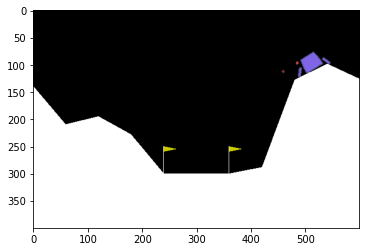

Cumulated Reward 43.45233157695367 Last Reward -100


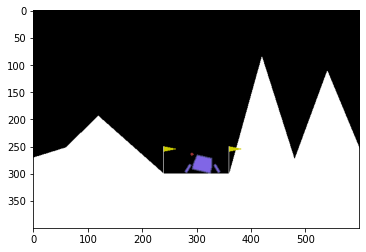

Cumulated Reward -59.272505156687785 Last Reward -100


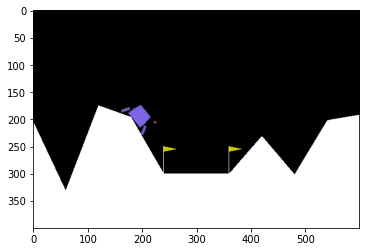

Cumulated Reward 34.83240756814956 Last Reward -100


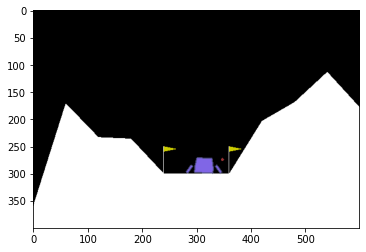

Cumulated Reward 64.50009113196862 Last Reward -100


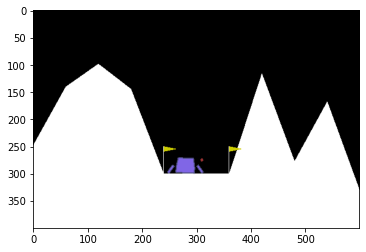

Cumulated Reward -21.674099183589362 Last Reward -100


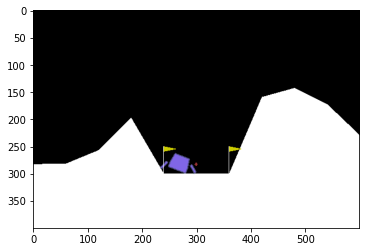

Cumulated Reward 308.8719692502812 Last Reward 100


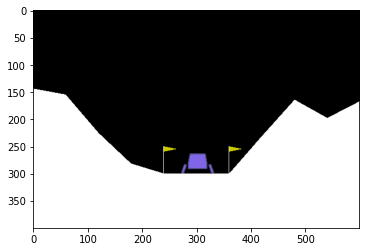

Cumulated Reward -60.43097585322517 Last Reward -100


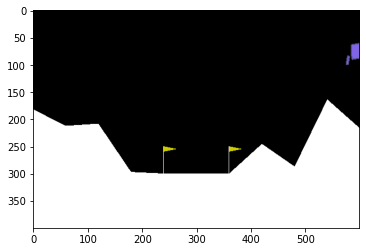

Cumulated Reward 284.6797493298387 Last Reward 100


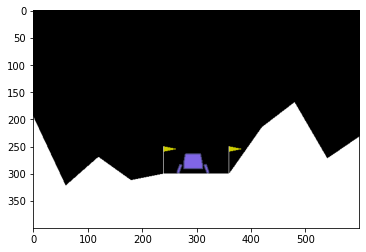

Cumulated Reward 37.19561853433092 Last Reward -100


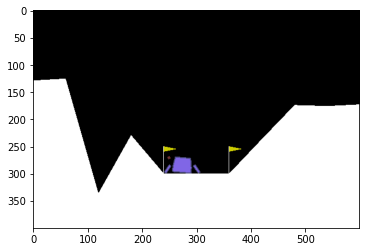

Cumulated Reward 282.3100483539197 Last Reward 100


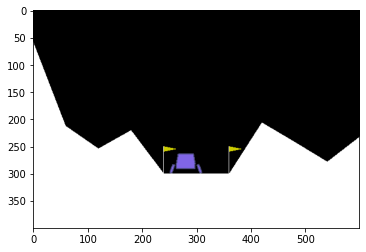

Cumulated Reward -14.2450822314714 Last Reward -100


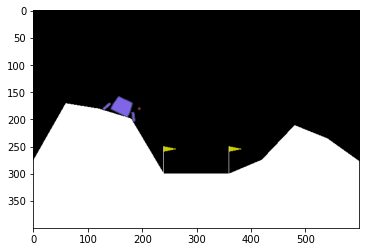

Cumulated Reward 218.0625352751726 Last Reward 100


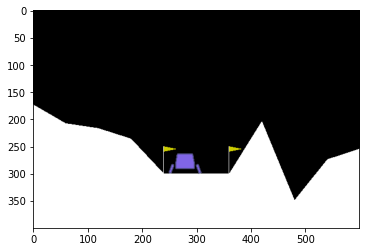

Cumulated Reward 260.579636253451 Last Reward 100


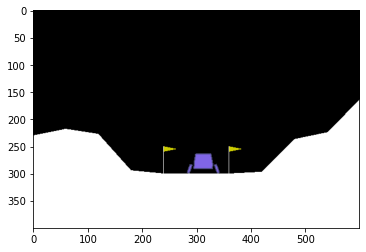

Cumulated Reward -42.15926727004006 Last Reward -100


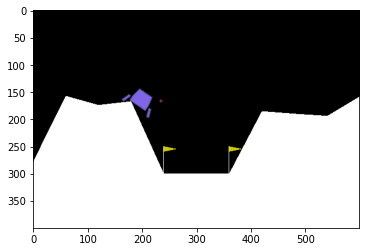

Cumulated Reward 265.4674791075383 Last Reward 100


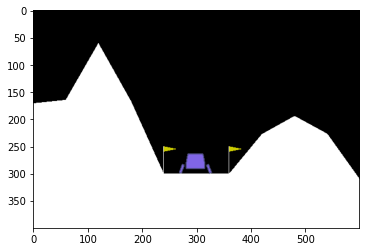

Cumulated Reward -93.05874483524724 Last Reward -100


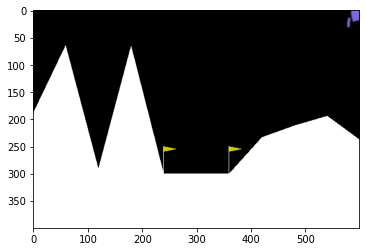

Cumulated Reward -72.77043277552936 Last Reward -100


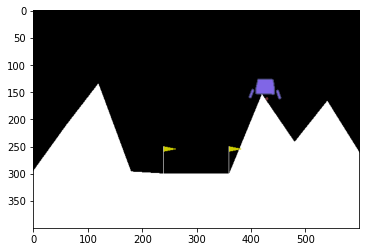

Cumulated Reward -145.85550278219563 Last Reward -100


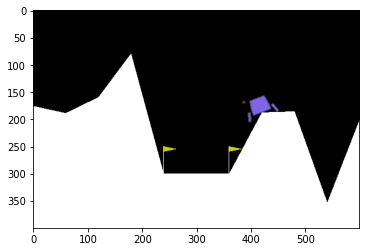

Cumulated Reward 73.45279917693054 Last Reward -100


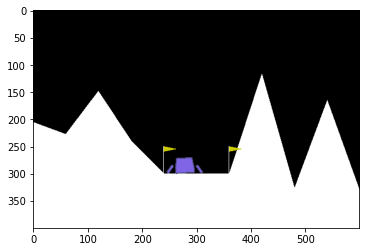

 -------------- Final Average Results -----------------
Mean Cumulated Reward 61.893893343938316 Mean Last Reward -40.0


In [ ]:
model = A2C.load("./tmp/gym/best_model.zip")

env = gym.make('LunarLander-v2')

TEST_LEVEL_NUMS = 20

cumulated_reward_ls = []
last_reward_ls = []

for i in range(TEST_LEVEL_NUMS):
  env.load_terrain(test_samples[i])
  # Logs will be saved in log_dir/monitor.csv
  log_dir='./video'
  env = wrap_env(env, log_dir)
  obs = env.reset()
  # plt.imshow(env.render(mode='rgb_array'))
  # plt.show()
  # print(env.terrain_y_values)
  cumulated_reward = 0.0
  last_reward = 0.0
  while True:
      
      action, _states = model.predict(obs, deterministic=True)
      obs, reward, done, info = env.step(action)
      cumulated_reward += reward
      last_reward = reward
      im = env.render('rgb_array') 
      
      if done: 
        break;
  print("Cumulated Reward", cumulated_reward, "Last Reward", last_reward)
  cumulated_reward_ls.append(cumulated_reward)
  last_reward_ls.append(last_reward)
  plt.imshow(env.render(mode='rgb_array'))
  plt.show()
print(" -------------- Final Average Results -----------------")
print("Mean Cumulated Reward", sum(cumulated_reward_ls)/len(cumulated_reward_ls), "Mean Last Reward", sum(last_reward_ls)/len(last_reward_ls))
              
env.close()
# show_video()

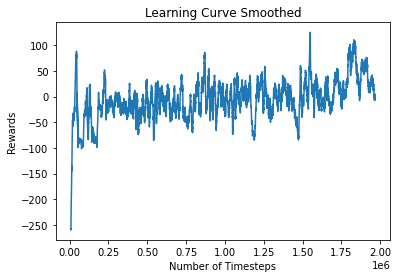

In [ ]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()
log_dir = "./tmp/gym/"
plot_results(log_dir)

In [ ]:
!ls ./tmp/gym/best_model

# from google.colab import files

# files.download('project.avi')

In [ ]:
import cv2

# Create and wrap the environment
env = gym.make('LunarLander-v2')
# Logs will be saved in log_dir/monitor.csv
env = Monitor(env, log_dir)
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (400,600))
 
obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    im = env.render('rgb_array')
    out.write(im)
    if done:
      obs = env.reset()
      print(reward)
      plt.figure()
      plt.imshow(im)

out.release()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (58, 105))



Error: ignored